# 1. Carga de datos

In [138]:
# Librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estilos
sns.set(style='whitegrid')

In [139]:
# Lectura de datos
df = pd.read_csv('../datos/crudos/Life Expectancy Data.csv') # Lee los datos
df.columns = df.columns.str.strip() # Quita los espacios de los nombres de las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [140]:
# Revisamos los valores únicos de la columna Country y contamos los registros de cada uno
country = df.Country.value_counts()
country.head(10)

Country
Afghanistan         16
Peru                16
Nicaragua           16
Niger               16
Nigeria             16
Norway              16
Oman                16
Pakistan            16
Panama              16
Papua New Guinea    16
Name: count, dtype: int64

In [141]:
# Tomamos solo los países con al menos 16 registros
df = df.groupby('Country').filter(lambda x: len(x) >= 16)

# 2. Tratamiento de campos nulos

In [142]:
# Agrupamos por la cantidad de nulos por Country
df['nulos'] = df.isnull().sum(axis=1)
nulos_country = df.groupby('Country')['nulos'].sum().sort_values(ascending=False)
nulos_country = pd.DataFrame(nulos_country)
nulos_country.head(10)

,nulos
Country,
South Sudan,122
Somalia,91
Democratic People's Republic of Korea,84
United Kingdom of Great Britain and Northern Ireland,81
Democratic Republic of the Congo,73
Czechia,68
United Republic of Tanzania,68
Côte d'Ivoire,67
United States of America,66


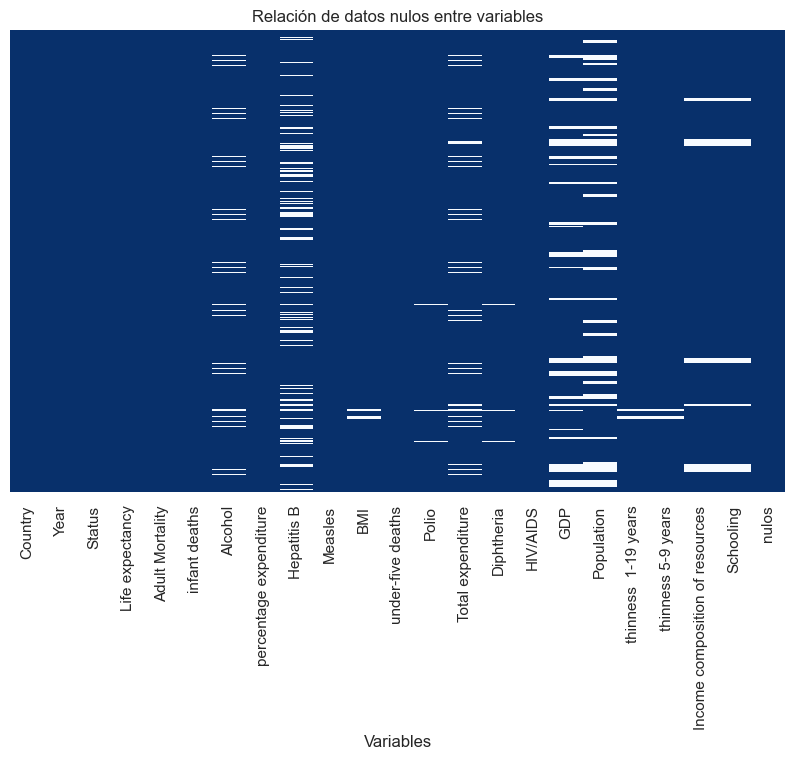

In [143]:
# Creamos un mapa de calor para visualizar los datos nulos para cada columna
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='Blues_r', cbar=False, yticklabels=False)
plt.title("Relación de datos nulos entre variables")
plt.xlabel("Variables")
plt.show()

In [144]:
# Eliminamos las columnas GDP y Population por la gran cantidad de campos nulos
df = df.drop(columns=['GDP', 'Population', 'Status', 'nulos'])

In [145]:
# Se llenan algunas columnas con la media de cada país
columnas_media = ['Alcohol', 'BMI', 'Polio', 'Total expenditure', 'Diphtheria', 'thinness  1-19 years',
                  'thinness 5-9 years', 'Income composition of resources', 'Schooling']

for columna in columnas_media:
    df[columna] = df.groupby('Country')[columna].apply(lambda x: x.fillna(x.mean())).reset_index(drop=True)

In [146]:
# Se llenan algunas columnas con la mediana de cada país
columnas_mediana = ['Hepatitis B']

for columna in columnas_mediana:
    df[columna] = df.groupby('Country')[columna].apply(lambda x: x.fillna(x.mean())).reset_index(drop=True)

In [147]:
# Agrupamos por la cantidad de nulos por Country
df['nulos'] = df.isnull().sum(axis=1)
nulos_country = df.groupby('Country')['nulos'].sum().sort_values(ascending=False)
nulos_country = pd.DataFrame(nulos_country)
nulos_country.head(10)

,nulos
Country,
Zimbabwe,100
Democratic People's Republic of Korea,47
United Kingdom of Great Britain and Northern Ireland,38
South Africa,36
Czechia,33
United Republic of Tanzania,32
Cyprus,32
Republic of Korea,32
Democratic Republic of the Congo,31


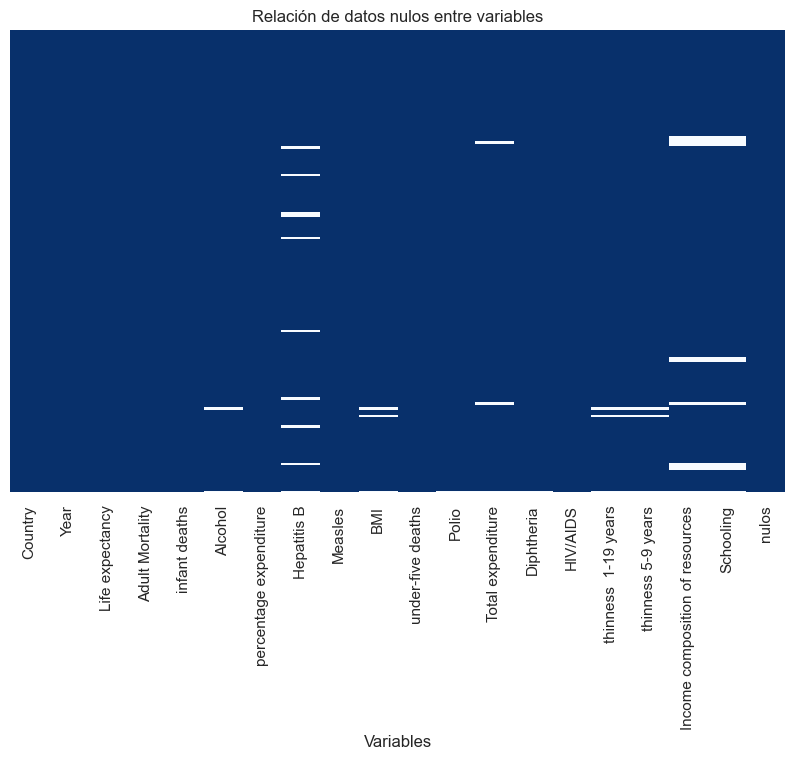

In [148]:
# Creamos un mapa de calor para visualizar los datos nulos por cada columna
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='Blues_r', cbar=False, yticklabels=False)
plt.title("Relación de datos nulos entre variables")
plt.xlabel("Variables")
plt.show()

In [149]:
# Eliminamos a Zimbawe que tiene 100 campos nulos
df = df[df['Country'] != 'Zimbabwe']

# Para el ejercició, llenamos los demás campos nulos con la media global de cada columna
for columna in df.columns:
    if df[columna].dtype in ['float64', 'int64']:
        df[columna] = df[columna].fillna(df[columna].mean())

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2912 entries, 0 to 2921
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2912 non-null   object 
 1   Year                             2912 non-null   int64  
 2   Life expectancy                  2912 non-null   float64
 3   Adult Mortality                  2912 non-null   float64
 4   infant deaths                    2912 non-null   int64  
 5   Alcohol                          2912 non-null   float64
 6   percentage expenditure           2912 non-null   float64
 7   Hepatitis B                      2912 non-null   float64
 8   Measles                          2912 non-null   int64  
 9   BMI                              2912 non-null   float64
 10  under-five deaths                2912 non-null   int64  
 11  Polio                            2912 non-null   float64
 12  Total expenditure        

In [150]:
# Se guardan los datos procesados
df.to_csv('../datos/procesados/procesado_life_expectancy.csv')